# Predicting Heart Disease using KNN Classifier

In [31]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [32]:
df=pd.read_csv('heart.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [33]:
df.shape

(319795, 18)

In [34]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [35]:
# df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})
# df['Asthma'] = df['Asthma'].map({'Yes': 1, 'No': 0})

df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [36]:
df = df.replace({'Yes': 1, 'No': 0}) 
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [37]:
df = pd.get_dummies(df, columns=['GenHealth'])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,...,1,5.0,1,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,...,1,7.0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,...,1,8.0,1,0,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,...,0,6.0,0,0,1,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,...,1,8.0,0,0,0,0,0,0,0,1


In [38]:
df = df.loc[:,['HeartDisease','BMI','PhysicalHealth','MentalHealth','SleepTime','Asthma']]
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Asthma
0,0,16.60,3.0,30.0,5.0,1
1,0,20.34,0.0,0.0,7.0,0
2,0,26.58,20.0,30.0,8.0,1
3,0,24.21,0.0,0.0,6.0,0
4,0,23.71,28.0,0.0,8.0,0


In [39]:
from sklearn import preprocessing,neighbors 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

<AxesSubplot: >

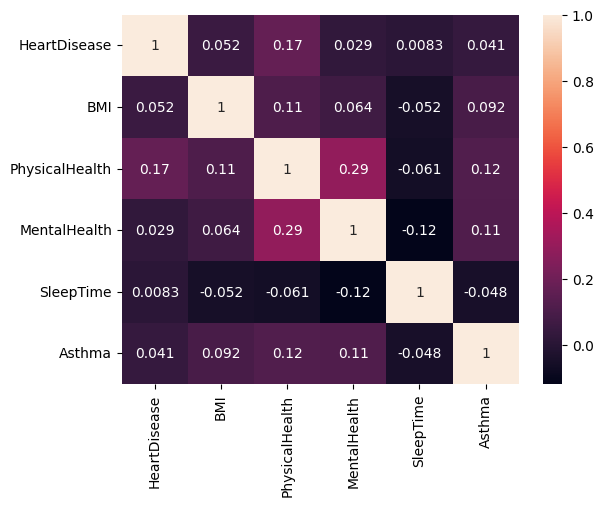

In [40]:
sns.heatmap(df.corr(),annot=True)

In [41]:
X = df.iloc[:,[1,2,3,4,5]]
X.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Asthma
0,16.60,3.0,30.0,5.0,1
1,20.34,0.0,0.0,7.0,0
2,26.58,20.0,30.0,8.0,1
3,24.21,0.0,0.0,6.0,0
4,23.71,28.0,0.0,8.0,0


In [42]:
y = df.iloc[:,[0]]
y.head()

,HeartDisease
0,0
1,0
2,0
3,0
4,0


In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [44]:
X_train.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Asthma
186186,23.92,0.0,0.0,8.0,0
170826,26.37,0.0,0.0,7.0,1
224430,24.41,0.0,0.0,8.0,0
236521,23.03,0.0,0.0,8.0,0
89754,23.91,0.0,0.0,8.0,0


In [45]:
y_train.head()

,HeartDisease
186186,0
170826,1
224430,0
236521,0
89754,0


In [46]:
clf=neighbors.KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train,y_train)

c:\Users\yashw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [49]:
# from mlxtend.plotting import plot_decision_regions  
# import matplotlib.pyplot as plt
# plot_decision_regions(X, y, clf=clf, legend=2) 
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Knn with K='+ str(k))
# plt.show()

In [50]:
y_predict=clf.predict(X_test)

In [51]:
y_predict = np.array(y_predict)
y_test = np.array(y_test)
for i in range(100):
    print(y_predict[i],' ', y_test[i])

0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [1]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [1]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [1]
0   [0]
0   [0]
0   [0]
0   [0]
0   [1]
0   [1]
0   [0]
0   [0]
0   [0]
0   [1]
0   [0]
0   [0]
0   [0]
0   [0]
0   [1]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [1]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [1]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [1]
0   [0]
0   [0]
0   [0]
0   [0]
0   [1]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]
0   [0]


In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95    117029
           1       0.20      0.01      0.02     10889

    accuracy                           0.91    127918
   macro avg       0.56      0.50      0.49    127918
weighted avg       0.85      0.91      0.87    127918



In [53]:
confusion_matrix(y_test, y_predict)

array([[116475,    554],
       [ 10750,    139]], dtype=int64)

In [54]:
print('Accuracy is: ', accuracy_score(y_test, y_predict)*100)

Accuracy is:  91.16308885379696


## Random Forest

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [56]:
X_train.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Asthma
209116,27.98,0.0,0.0,7.0,1
201082,23.91,0.0,2.0,6.0,0
82876,19.01,0.0,15.0,6.0,0
172717,33.37,0.0,7.0,6.0,0
304008,21.08,0.0,30.0,9.0,0


In [57]:
y_train.head()

,HeartDisease
209116,0
201082,0
82876,0
172717,0
304008,0


In [58]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [59]:
clf.fit(X_train, y_train)

C:\Users\yashw\AppData\Local\Temp\ipykernel_9900\2395142735.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

In [60]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94    116897
           1       0.16      0.06      0.08     11021

    accuracy                           0.89    127918
   macro avg       0.54      0.51      0.51    127918
weighted avg       0.85      0.89      0.87    127918



In [62]:
confusion_matrix(y_test, y_preds)

array([[113659,   3238],
       [ 10400,    621]], dtype=int64)

In [63]:
accuracy_score(y_test, y_preds)*100

89.33848246532935